In [1]:
import os
os.chdir("C:\\Users\\Poori\\Desktop\\Udemy\\A-Z Machine learning Kaggle\\Github\\DataSet")

In [3]:
import pandas as pd
import numpy as np
titanic=pd.read_csv("titanic.csv")

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#survival analysis (main analysis)

In [5]:
import pylab as plt

In [8]:
titanic['Pclass'].isnull().value_counts()
#titanic['Pclass'].isnull().sum()

False    891
Name: Pclass, dtype: int64

In [10]:
titanic['Survived'].isnull().value_counts()

False    891
Name: Survived, dtype: int64

In [15]:
survivors=titanic.groupby('Pclass')['Survived'].agg(sum)

In [16]:
survivors

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [13]:
total_passengers=titanic.groupby('Pclass')['PassengerId'].count()

In [14]:
total_passengers

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [17]:
survivor_percentage=survivors/total_passengers

In [39]:
survivor_percentage
# in class one we have highest survival percentage, in class 2 it is second and followed by class 3 with respect to the toal
# number of passengers present in each class

Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64

In [29]:
import matplotlib.pyplot as plt
#survivors.index.values.tolist()
#survivors.head()

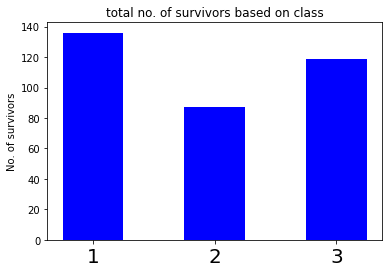

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivors.index.values.tolist(), survivors, color='blue', width=0.5)
ax.set_ylabel('No. of survivors')
ax.set_title('total no. of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(xTickMarks)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

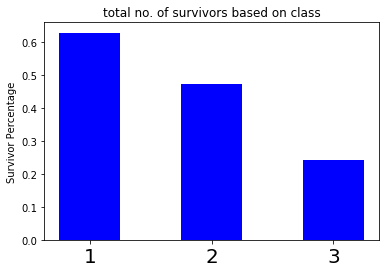

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivors.index.values.tolist(), survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Survivor Percentage')
ax.set_title('total no. of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(xTickMarks)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

In [40]:
#distribution based on gender

In [41]:
titanic['Sex'].isnull().value_counts()

False    891
Name: Sex, dtype: int64

In [55]:
male_survivors = titanic[titanic['Sex'] == 'male'].groupby('Pclass')['Survived'].agg(sum)
male_survivors
male_survivor_percentage = male_survivors / male_total_passengers

In [44]:
male_total_passengers = titanic[titanic['Sex'] == 'male'].groupby('Pclass')['PassengerId'].count()
male_total_passengers

Pclass
1    122
2    108
3    347
Name: PassengerId, dtype: int64

In [47]:
female_survivors = titanic[titanic['Sex'] == 'female'].groupby('Pclass')['Survived'].agg(sum)
female_survivors

Pclass
1    91
2    70
3    72
Name: Survived, dtype: int64

In [54]:
female_total_passengers = titanic[titanic['Sex'] == 'female'].groupby('Pclass')['PassengerId'].count()
female_total_passengers
female_survivor_percentage = female_survivors /female_total_passengers

In [49]:
np.arange(male_survivors.count())

array([0, 1, 2])

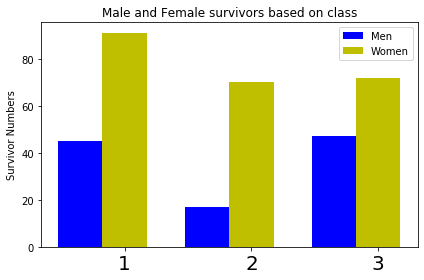

In [60]:
#plotting number of passengers survived based on gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivors.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivors, bar_width, color='blue', label='Men')
rect2 = ax.bar(index + bar_width, female_survivors, bar_width, color='y', label='Women')
ax.set_ylabel('Survivor Numbers')
ax.set_title('Male and Female survivors based on class')
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

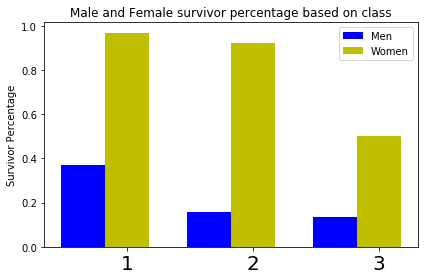

In [64]:
#plotting percent of passengers survived based on gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivor_percentage.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivor_percentage, bar_width, color='blue', label='Men')
rect2 = ax.bar(index + bar_width, female_survivor_percentage, bar_width, color='y', label='Women')
ax.set_ylabel('Survivor Percentage')
ax.set_title('Male and Female survivor percentage based on class')
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()
#majority of survivors in all classes are women
#more than 90% of first and second class passengers survived
#percent of male passengers survived in first and third classes are comparable

In [65]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
titanic['SibSp'].isnull().value_counts()

False    891
Name: SibSp, dtype: int64

In [67]:
titanic['Parch'].isnull().value_counts()

False    891
Name: Parch, dtype: int64

In [69]:
non_survivors = titanic[(titanic['SibSp'] > 0) | (titanic['Parch'] > 0) & (titanic['Survived'] == 0)].groupby('Pclass')['Survived'].agg('count')
non_survivors

Pclass
1     88
2     66
3    153
Name: Survived, dtype: int64

In [71]:
total_passengers = titanic.groupby('Pclass') ['PassengerId'].count()
total_passengers

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [72]:
non_survivor_percentage = non_survivors / total_passengers
non_survivor_percentage

Pclass
1    0.407407
2    0.358696
3    0.311609
dtype: float64

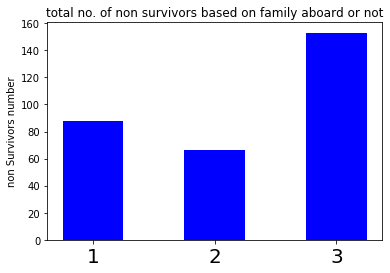

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivors.index.values.tolist(), non_survivors, color='blue', width=0.5)
ax.set_ylabel('non Survivors number')
ax.set_title('total no. of non survivors based on family aboard or not')
xTickMarks = non_survivors.index.values.tolist()
ax.set_xticks(xTickMarks)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

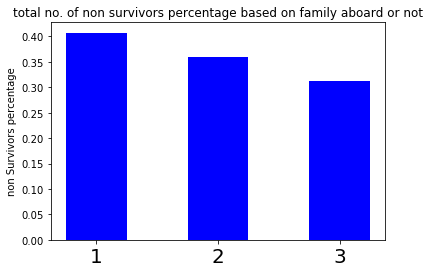

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivors.index.values.tolist(), non_survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('non Survivors percentage')
ax.set_title('total no. of non survivors percentage based on family aboard or not')
xTickMarks = non_survivors.index.values.tolist()
ax.set_xticks(xTickMarks)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

In [77]:
#lot of non survivors in class 3
#With respect to the total number of passengers, the first class, who had relatives aboard, has the maximum nonsurvivor
#percentage and the third class has the least

In [78]:
#survival percentage among different age groups

In [79]:
titanic['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [82]:
age_bin = [0, 18, 25, 40, 60, 100]
titanic['AgeBin'] = pd.cut(titanic.Age, bins=age_bin)

In [83]:
titanic_temp = titanic[np.isfinite(titanic['Age'])]  #removing all null instances

In [84]:
titanic_temp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18, 25]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(25, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(25, 40]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(25, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(25, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,"(25, 40]"
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(25, 40]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(18, 25]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(25, 40]"


In [85]:
#survivors based on age bin
survivors = titanic_temp.groupby('AgeBin')['Survived'].agg(sum)
survivors

AgeBin
(0, 18]       70
(18, 25]      54
(25, 40]     111
(40, 60]      50
(60, 100]      5
Name: Survived, dtype: int64

In [86]:
#total passengers in age groups
total_passengers = titanic_temp.groupby('AgeBin')['Survived'].agg('count')
total_passengers

AgeBin
(0, 18]      139
(18, 25]     162
(25, 40]     263
(40, 60]     128
(60, 100]     22
Name: Survived, dtype: int64

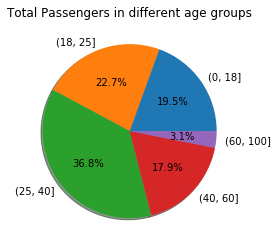

In [89]:
plt.pie(total_passengers, labels=total_passengers.index.values.tolist(),autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Total Passengers in different age groups')
plt.show()

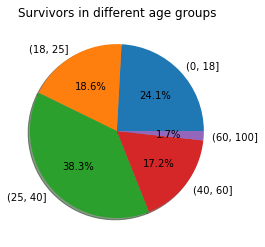

In [90]:
plt.pie(survivors, labels=survivors.index.values.tolist(),autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Survivors in different age groups')
plt.show()